# Task 4.10

### Contents
    1. Import Libraries/ Data
    2. Consider Security Implications
    3. Compare Customer Behavior In Different Regions
    4. Create Low order Number Flag
    5. Create Customer Profiles
        5.1 Age Profile
        5.2 Income profile
        5.3 Dependants Profile
        5.4 Alcohol Profile
        5.5 Baby Profile
        5.6 Pet Profile
    6. Create Visuals For Profiles
        6.1 Income Distribution Histogram
        6.2 Age and Income Line Graph
        6.3 Age and Income of Pet Owners
        6.4 Age and Income of Alcohol Consumers
        6.5 Family Status of Baby Consumers
        6.6 Number of Dependants for Baby Aisle Consumers
        6.7 Family Status of Baby Aisle Consumers 
        6.8 Gender of Pet Aisle Consumers
    7. Aggregating Profiles for Usage
        7.1 Age Profile Aggregation
        7.2 Income Profile Aggregation
        7.3 Dependants Profile Aggregation
        7.4 Alcohol Profile Aggregation
        7.5 Pet Profile Aggregation
        7.6 Baby Profile Aggregation
     8. Compare Profiles with Regions
        8.1 Age Profile in Each Region
        8.2 Income in Each Region
        8.3 Dependants in Each Region
        8.4 Alcohol Consumers in Each Region
        8.5 Baby Profile in Each Region
        8.6 Baby Profile in Each Region
     9. Export Visuals 
     10. Export Final Data

# 1. Import Libraries and Data

In [3]:
# 1 Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# 1 Import Data: Create Path
path = r'C:\Users\419182\8-10-2022 Instacart Basket Analysis'

In [5]:
# 1 Import Data
All_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'All_data.pkl'))

# 2 Security Implications

In [4]:
# 2 Consider any security implications
All_data.head(10)

,user_id,Gender,STATE,Age,date_joined,number_dependants,fam_status,income,Unnamed: 0_x,product_id,...,busiest_period_of_day,price_range,price_label,max_order,loyalty_flag,mean_order,spending_flag,median_days_since_prior_order,Frequency_flag,True
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Most Orders,Mid-range product,Mid-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Most Orders,Mid-range product,Mid-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,195,196,...,Most Orders,Mid-range product,Mid-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Most Orders,Low-range product,Low-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Most Orders,Low-range product,Low-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
5,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Average Orders,Low-range product,Low-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
6,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Most Orders,Low-range product,Low-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
7,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Average Orders,Low-range product,Low-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
8,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Most Orders,Low-range product,Low-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both
9,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,6184,...,Most Orders,Low-range product,Low-range product,8,New customer,7.988889,Low spender,19.0,Regular customer,both


I beleive the only PII of concern would be the User_ids in the data.  They could potentially be traced back to a single individual, but not through this data set because the names have been removed. 

In [5]:
# Check Columns
All_data.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'number_dependants',
       'fam_status', 'income', 'Unnamed: 0_x', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'Unnamed: 0_y', 'Unnamed: 0.1',
       'order_id', 'evaluation_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'exists', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'price_range', 'price_label',
       'max_order', 'loyalty_flag', 'mean_order', 'spending_flag',
       'median_days_since_prior_order', 'Frequency_flag', 'True'],
      dtype='object')

# 3 Compare Customer behavior in different regions

In [6]:
# 3 Create a List of Different Regions
Northeast=['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']
Midwest=['Wisconsin','Michigan','Illinois','Indiana','Ohio','North Dakota','South Dakota','Nebraska','Kansas','Minnesota','Iowa','Missouri']
South=['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky', 'Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']
West=['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [7]:
# Create the Flags for Each 
All_data.loc[All_data['STATE'].isin(Northeast), 'Region'] = 'Northeast'

In [8]:
All_data.loc[All_data['STATE'].isin(Midwest), 'Region'] = 'Midwest'

In [9]:
All_data.loc[All_data['STATE'].isin(South), 'Region'] = 'South'

In [10]:
All_data.loc[All_data['STATE'].isin(West), 'Region'] = 'West'

In [11]:
# Check Regions 
All_data['Region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: Region, dtype: int64

In [12]:
# Cross Tab with spending flag to understand regional spending 
crosstab = pd.crosstab(All_data['Region'], All_data['spending_flag'], dropna = False)

In [13]:
# View
crosstab

spending_flag,High spender,Low spender
Region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Based on the above cross tab, the South has the most high spenders. It is also important to note that the south has the most low spenders as well.  The west has more high spenders than the Midwest and Northeast.  There are differences in the spenidng habits of regions. 

# 4 Create Low Order Number Flag

In [14]:
# Create Flags for Each (Less than 5 Low, more than 5 'Normal')
All_data.loc[All_data['max_order']>=5, 'Activity'] = 'Normal'

In [15]:
All_data.loc[All_data['max_order']<5, 'Activity'] = 'Low'

In [16]:
# Check 
All_data['Activity'].value_counts()

Normal    30964564
Low        1440295
Name: Activity, dtype: int64

In [17]:
# Create Low order Data frame
Low_activity_customers = All_data[All_data['Activity']=='Low']

In [18]:
# Export Low Acticity Customers
Low_activity_customers.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Low_activity_customers.pkl'))

In [19]:
# Exclude Low activty customers
All_Data_Active = All_data[All_data['Activity']=='Normal']

# 5 Create Customer Profiles 

# 5.1 Age Profile 

In [20]:
# 5.1 Create Age profile: <=35 years old is young, 36-59 is middle, 60 and older is old
All_Data_Active.loc[All_Data_Active['Age']<=35, 'Age_Profile']='Young'

C:\Users\419182\Newanaconda\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\419182\Newanaconda\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [21]:
All_Data_Active.loc[(All_Data_Active['Age']<=59)&(All_Data_Active['Age']>35), 'Age_Profile']='Middle'

In [22]:
All_Data_Active.loc[All_Data_Active['Age']>59, 'Age_Profile']='Old'

In [23]:
# Check 
All_Data_Active['Age_Profile'].value_counts()

Middle    11651255
Old       10574504
Young      8738805
Name: Age_Profile, dtype: int64

# 5.2 Income Profile

In [24]:
# 5.2 Create Income Flag 
All_Data_Active.loc[All_Data_Active['income']<=50000, 'Income_Profile']='Low'

In [25]:
All_Data_Active.loc[(All_Data_Active['income']>50000)&(All_Data_Active['Age']<=150000), 'Income_Profile']='Middle'

In [26]:
All_Data_Active.loc[All_Data_Active['income']>150000, 'Income_Profile']='High'

In [27]:
# Check 
All_Data_Active['Income_Profile'].value_counts()

Middle    23707476
High       3894534
Low        3362554
Name: Income_Profile, dtype: int64

# 5.3 Dependants Profile

In [28]:
# 5.3 Create Dependants Flag 
All_Data_Active.loc[All_Data_Active['number_dependants']>0, 'Dependants_Profile']='Dependants'

In [29]:
All_Data_Active.loc[All_Data_Active['number_dependants']<=0, 'Dependants_Profile']='No_Dependants'

In [30]:
# Check 
All_Data_Active['Dependants_Profile'].value_counts()

Dependants       23224883
No_Dependants     7739681
Name: Dependants_Profile, dtype: int64

In [31]:
# Generate other profile Ideas
All_Data_Active['department_id'].value_counts()

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

In [32]:
# check columns
All_Data_Active.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'number_dependants',
       'fam_status', 'income', 'Unnamed: 0_x', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'Unnamed: 0_y', 'Unnamed: 0.1',
       'order_id', 'evaluation_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'exists', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'price_range', 'price_label',
       'max_order', 'loyalty_flag', 'mean_order', 'spending_flag',
       'median_days_since_prior_order', 'Frequency_flag', 'True', 'Region',
       'Activity', 'Age_Profile', 'Income_Profile', 'Dependants_Profile'],
      dtype='object')

In [33]:
# Import Department Data Set to gether ideas of customer groups
dep_data = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'),index_col=False)

In [34]:
# Look at different departments
dep_data.head(25)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


# 5.4 Alcohol Drinker Profile

In [35]:
#  5.4 Make a column with alcohol or non alcohol drinkers.  1 is alcohol drinker, 0 is no alcohol to help with memory issues
All_Data_Active['Alcohol_Consumer'] = [1 if x == 5 else 0 for x in All_Data_Active['department_id']]

C:\Users\419182\AppData\Local\Temp/ipykernel_19384/1203232127.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_Data_Active['Alcohol_Consumer'] = [1 if x == 5 else 0 for x in All_Data_Active['department_id']]


In [36]:
# check
All_Data_Active['Alcohol_Consumer'].value_counts()

0    30819937
1      144627
Name: Alcohol_Consumer, dtype: int64

# 5.5 Baby Profile 

In [37]:
# 5.5 Make a column with users who have babies or users without babies.  1 is user with abby, 0 is no baby to help with memory issues
All_Data_Active['With_Baby'] = [1 if x == 18 else 0 for x in All_Data_Active['department_id']]

C:\Users\419182\AppData\Local\Temp/ipykernel_19384/3679216184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_Data_Active['With_Baby'] = [1 if x == 18 else 0 for x in All_Data_Active['department_id']]


In [38]:
All_Data_Active['With_Baby'].value_counts()

0    30554172
1      410392
Name: With_Baby, dtype: int64

# 5.6 Pet Profile

In [39]:
# Make a column for customers with pets or no pet customers.  1 is pets, 0 is no pet to help with memory issues
All_Data_Active['Has_Pets'] = [1 if x == 8 else 0 for x in All_Data_Active['department_id']]

C:\Users\419182\AppData\Local\Temp/ipykernel_19384/1648236100.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  All_Data_Active['Has_Pets'] = [1 if x == 8 else 0 for x in All_Data_Active['department_id']]


In [40]:
All_Data_Active['Has_Pets'].value_counts()

0    30871504
1       93060
Name: Has_Pets, dtype: int64

In [41]:
# Check Columns
All_Data_Active.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'number_dependants',
       'fam_status', 'income', 'Unnamed: 0_x', 'product_id', 'product_name',
       'aisle_id', 'department_id', 'prices', 'Unnamed: 0_y', 'Unnamed: 0.1',
       'order_id', 'evaluation_set', 'order_number', 'order_dow',
       'order_hour_of_day', 'days_since_prior_order', 'prior_order',
       'add_to_cart_order', 'reordered', '_merge', 'exists', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'price_range', 'price_label',
       'max_order', 'loyalty_flag', 'mean_order', 'spending_flag',
       'median_days_since_prior_order', 'Frequency_flag', 'True', 'Region',
       'Activity', 'Age_Profile', 'Income_Profile', 'Dependants_Profile',
       'Alcohol_Consumer', 'With_Baby', 'Has_Pets'],
      dtype='object')

# Create Visualizations for Profile 

In [42]:
# create seed for sample 
np.random.seed(6)
dev = np.random.rand(len(All_Data_Active)) <= 0.7

In [43]:
# Split data frame into 2 samples
# 70%
big = All_Data_Active[dev]

In [44]:
# 30%
small = All_Data_Active[~dev]

In [45]:
# Check to make sure it is divided 
len(All_Data_Active)

30964564

In [46]:
len(big) + len(small)

30964564

In [47]:
# Reduce samples to applicable columns 
df_line = small[['income', 'Age']]

# 6.1 Income Distribution Histogram

Text(0.5, 1.0, 'Income Distribution')

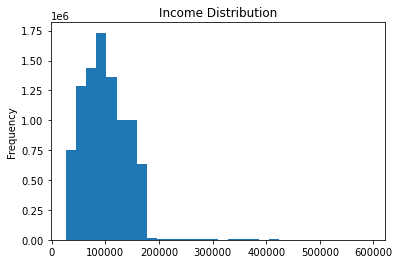

In [115]:
# Create a histogram of income distribution
hist = small['income'].plot.hist(bins = 30)
plt.title('Income Distribution')

# 6.2 Age and Income Line Graph

Text(0.5, 1.0, 'Age and Income')

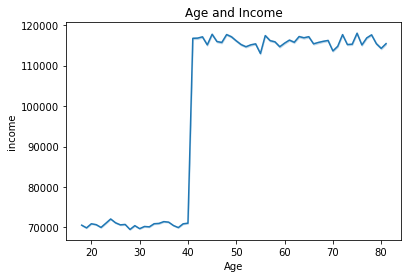

In [116]:
# Make a line graph of age and income 
line = sns.lineplot(data = df_line, x = 'Age', y = 'income')
plt.title('Age and Income')

# 6.3 Age and Income of Pet Consumers

In [49]:
# Create a dataframe of pet owners
Pet = All_Data_Active[All_Data_Active['Has_Pets']==1]

In [50]:
# Check Value counts
All_Data_Active['Has_Pets'].value_counts()

0    30871504
1       93060
Name: Has_Pets, dtype: int64

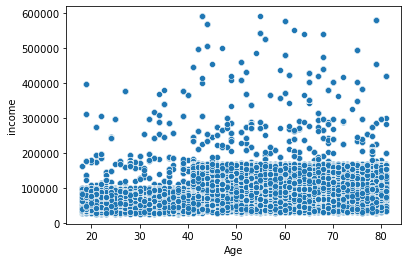

In [131]:
# create scatter plot
scatter1 = sns.scatterplot(data = Pet, x = 'Age', y = 'income')

# 6.4 Age and Income of Alcohol Consumers

In [52]:
# Create alcohol consumer dataframe
Alcohol = All_Data_Active[All_Data_Active['Alcohol_Consumer']==1]

In [53]:
# check value counts 
Alcohol['Alcohol_Consumer'].value_counts()

1    144627
Name: Alcohol_Consumer, dtype: int64

Text(0.5, 1.0, 'Age and Income of Alcohol Buyers')

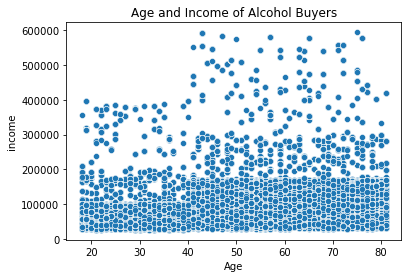

In [119]:
# Create Scatter plot of age and income of alcohol consumers 
scatter = sns.scatterplot(data = Alcohol, x = 'Age', y = 'income')
plt.title('Age and Income of Alcohol Buyers')

Here, we can view the age and income of the customers who have purchased alcohol.  It appears that varying ages purchased alcohol.

# 6.5 Family Status of Baby Consumers Plot

In [55]:
# create a dataframe of consumers who purchased something in the baby aisle
Baby = All_Data_Active[All_Data_Active['With_Baby']==1]

Text(0.5, 1.0, 'Family Status of Baby Consumers')

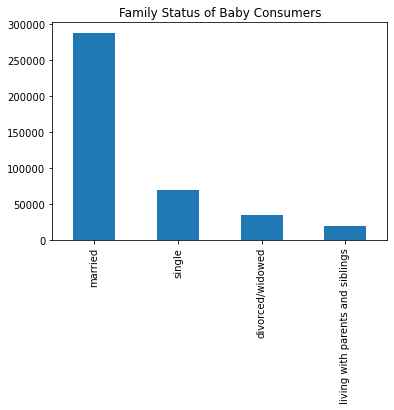

In [134]:
# create a bar chart of the family status of consumers who purchased in the baby aisle 
Barb = Baby['fam_status'].value_counts().plot.bar()
plt.title('Family Status of Baby Consumers')

The column is labeled with baby, but it is limiting to assume that all individuals that purchased an item in the baby department have a baby.  As you can see, individuals with babies come from varying family status.  Next I will cross check the list of consumers with purchases in the baby aisle with their number of dependents. 

# 6.6 Number of Dependants of Baby Aisle Consumers

Text(0.5, 1.0, 'Number of Dependants for Baby Aisle Consumers')

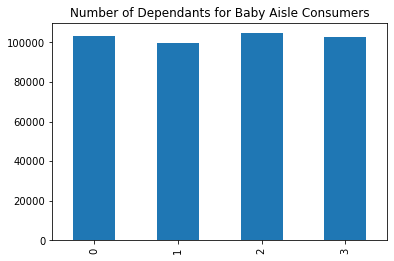

In [121]:
# Create a bar chart showing the number of dependents for consumers who purchased items in the baby aisle 
Bar = Baby['number_dependants'].value_counts().sort_index().plot.bar()
plt.title('Number of Dependants for Baby Aisle Consumers')

Here, you can see that the second most purchases in the baby aisle were attributed to consumer ids that had no dependants. 

# 6.7 Family Status of Non Baby Consumers

In [58]:
# create a dataframe for consumers who did not purchase items in the baby aisle 
Baby2 = All_Data_Active[All_Data_Active['With_Baby']==0]

Text(0.5, 1.0, 'Family Status of Non Baby Consumers')

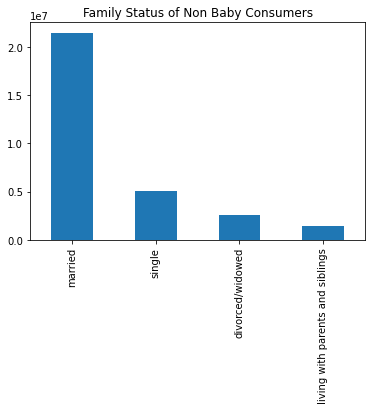

In [122]:
# create bar chart showing consumers family status who did not purchase baby aisle items 
Bar2 = Baby2['fam_status'].value_counts().plot.bar()
plt.title('Family Status of Non Baby Consumers')

The majority of consumers that did not make purchases in the baby aisle were married individuals. 

# 6.8 Gender of Pet Consumers

Text(0.5, 1.0, 'Pet Consumer Gender')

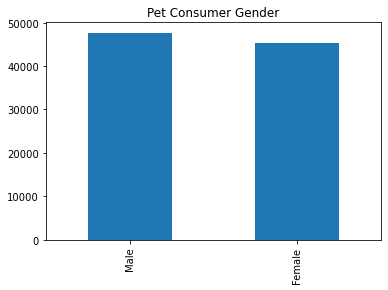

In [123]:
# create a bar chart of the gender of consumers who purchased a pet related item 
Bar3 = Pet['Gender'].value_counts().plot.bar()
plt.title('Pet Consumer Gender')

More males than females made purchases in the pet section. 

# 7 Aggregate Profiles for Usage 

# 7.1 Age Profile Aggregate 

In [61]:
#aggregating for age group expenditure
All_Data_Active.groupby('Age_Profile').agg({'prices': ['mean', 'min', 'max']})

prices              
                  mean  min      max
Age_Profile                         
Middle       12.010174  1.0  99999.0
Old          11.724449  1.0  99999.0
Young        12.084312  1.0  99999.0

# 7.2 Income Profile Aggregate 

In [62]:
#aggregating for income
All_Data_Active.groupby('Income_Profile').agg({'income': ['mean', 'min', 'max']})

income                
                         mean     min     max
Income_Profile                               
High            170460.038059  150002  593901
Low              39817.430126   25903   49998
Middle           96537.861372   50001  150000

# 7.3 Dependants Profile Aggregate

In [63]:
# #aggregating for dependants
All_Data_Active.groupby('fam_status').agg({'number_dependants': ['mean', 'min', 'max']})

number_dependants        
                                              mean min max
fam_status                                                
divorced/widowed                          0.000000   0   0
living with parents and siblings          1.986783   1   3
married                                   2.003357   1   3
single                                    0.000000   0   0

# 7.4 Alcohol Profile Aggregate

In [64]:
# aggregating for alcohol profile
All_Data_Active.groupby(['Alcohol_Consumer']).agg({'prices':['mean', 'min', 'max'], 'income':['mean', 'min', 'max']})

prices                       income               
                       mean  min      max           mean    min     max
Alcohol_Consumer                                                       
0                 11.951273  1.0  99999.0   99638.474396  25903  593901
1                  8.150699  1.0     15.0  107643.805928  26170  593901

# 7.5 Pet Profile Aggregate 

In [65]:
# aggregating for pet profile
All_Data_Active.groupby(['Has_Pets']).agg({'prices':['mean', 'min', 'max'], 'income':['mean', 'min', 'max']})

prices                       income               
               mean  min      max           mean    min     max
Has_Pets                                                       
0         11.945718  1.0  99999.0   99663.357562  25903  593901
1          7.887489  1.0     15.0  103825.088577  26256  591089

# Baby Profile Aggregate

In [66]:
# aggregating for baby profile
All_Data_Active.groupby(['With_Baby']).agg({'Age':['mean', 'min', 'max'], 'income':['mean', 'min', 'max']})

Age                 income               
                mean min max           mean    min     max
With_Baby                                                 
0          49.469861  18  81   99644.586509  25903  593901
1          49.331347  18  81  102004.593913  25991  579169

# 8 Compare Customer Profiles with Regions

# 8.1 Age Profile and Region

In a previous cell, I looked at the distribution of age and income.  Now, I will compare age profile with region.

In [67]:
All_Data_Active['Region'].value_counts()

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: Region, dtype: int64

In [68]:
# create subset to graph
South = All_Data_Active[All_Data_Active['Region']=='South']

Text(0.5, 1.0, 'Age Profile in the South')

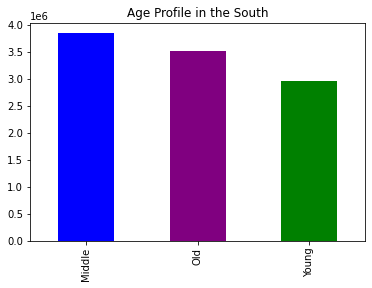

In [73]:
# plot for the south region
Bar5 = South['Age_Profile'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])
plt.title('Age Profile in the South')

In [70]:
# create subset to graoh
West = All_Data_Active[All_Data_Active['Region']=='West']

Text(0.5, 1.0, 'Age Profile in the West')

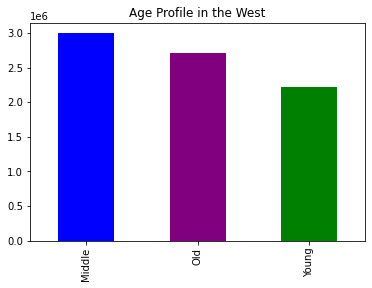

In [74]:
# plot for the west region
Bar6 = West['Age_Profile'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])
plt.title('Age Profile in the West')

In [75]:
# create subset to graph
Midwest = All_Data_Active[All_Data_Active['Region']=='Midwest']

Text(0.5, 1.0, 'Age Profile in the Midwest')

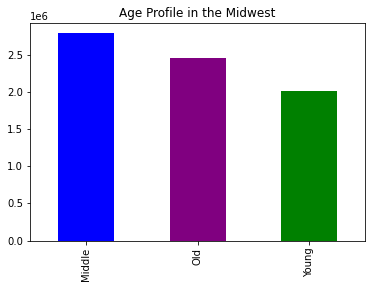

In [76]:
# plot for midwest region
Bar7 = Midwest['Age_Profile'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])
plt.title('Age Profile in the Midwest')

In [77]:
# create subset to graph
Northeast = All_Data_Active[All_Data_Active['Region']=='Northeast']

Text(0.5, 1.0, 'Age Profile in the Northeast')

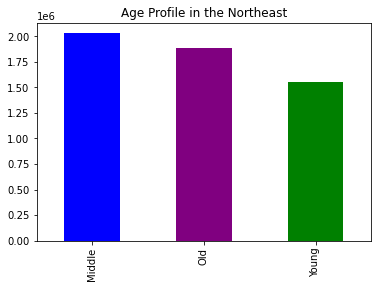

In [144]:
# plot for the northeast region
Bar8 = Northeast['Age_Profile'].value_counts().plot.bar(color = ['blue', 'purple', 'green'])
plt.title('Age Profile in the Northeast')

# 8.2 Income in Each Region

In [103]:
# create cross tab for income profile and region
income =pd.crosstab(All_Data_Active['Income_Profile'], All_Data_Active['Region'])
income

Region,Midwest,Northeast,South,West
Income_Profile,,,,
High,916961,677680,1290303,1009590
Low,783764,587137,1142572,849081
Middle,5560788,4199868,7878264,6068556


Text(0.5, 1.0, 'Income Profile per Region')

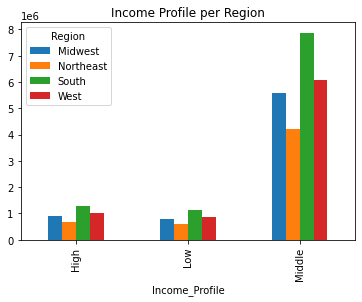

In [124]:
# plot crosstab
bar13 = income.plot.bar()
plt.title('Income Profile per Region')

# 8.3 Number of Dependants in each region 

In [98]:
# create cross tab for dependants profile and region
dependents =pd.crosstab(All_Data_Active['Dependants_Profile'], All_Data_Active['Region'])
dependents

Region,Midwest,Northeast,South,West
Dependants_Profile,,,,
Dependants,5438697,4110203,7729206,5946777
No_Dependants,1822816,1354482,2581933,1980450


Text(0.5, 1.0, 'Dependants Profile per Region')

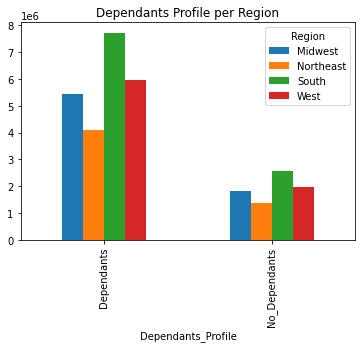

In [125]:
# plot crosstab
bar11 =dependents.plot.bar()
plt.title('Dependants Profile per Region')

# 8.4 Alcohol Consumers in each region 

In [109]:
# create cross tab for alcohol consumer and region
alc2 =pd.crosstab(All_Data_Active['Alcohol_Consumer'], All_Data_Active['Region'])
alc2

Region,Midwest,Northeast,South,West
Alcohol_Consumer,,,,
0,7227470,5439668,10262326,7890473
1,34043,25017,48813,36754


Text(0.5, 1.0, 'Alcohol Profile Per Region')

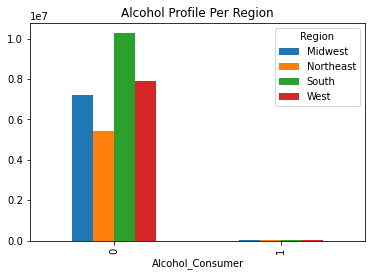

In [126]:
# plot crosstab
bar12 = alc2.plot.bar()
plt.title('Alcohol Profile Per Region')

# 8.5 Baby Consumers in Each Region

In [111]:
# create cross tab for region and consumers with baby purchases 
baby =pd.crosstab(All_Data_Active['With_Baby'], All_Data_Active['Region'])
baby

Region,Midwest,Northeast,South,West
With_Baby,,,,
0,7165772,5391973,10171628,7824799
1,95741,72712,139511,102428


Text(0.5, 1.0, 'Baby Profile Per Region')

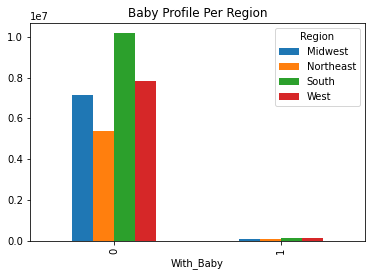

In [127]:
# plot crosstab
bar14 = baby.plot.bar()
plt.title('Baby Profile Per Region')

# 8.6 Pet Profiles in Each Region

In [113]:
# create cross tab with region and consumers who have made pet purchases
pet =pd.crosstab(All_Data_Active['Has_Pets'], All_Data_Active['Region'])
pet

Region,Midwest,Northeast,South,West
Has_Pets,,,,
0,7240155,5446951,10281230,7903168
1,21358,17734,29909,24059


Text(0.5, 1.0, 'Pet Profile Per Region')

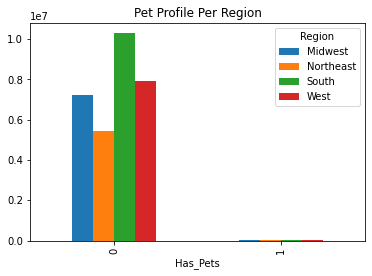

In [128]:
# plot crosstab
bar15 = pet.plot.bar()
plt.title('Pet Profile Per Region')

# 9 Export all Visuals 

In [129]:
# Export Income Distribution Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Income_Dist_Hist.png'))

In [130]:
# Export Age and Income Line Graph
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Age_Income_Line.png'))

In [132]:
# Export scatter plot of age and income of pet consumers
scatter1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Pet_Age_Income_Scatter.png'))

In [133]:
# Export scatterplot of age and income of alcohol consumers
scatter.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Alc_Age_Income_Scatter.png'))

In [136]:
# Export Family status of baby consumers plot
Barb.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Baby_famstat_bar.png'))

In [137]:
# Export number of dependants for baby aisle consumers plot
Bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Baby_dep_bar.png'))

In [139]:
# Export family status of non baby consumers plot
Bar2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 nobaby_famstat_bar.png'))

In [140]:
# Export gender of pet consumers plot
Bar3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Pet_gender_bar.png'))

In [141]:
# Export Age Profile South Plot
Bar5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 AgeP_South_bar.png'))

In [142]:
# Export Age Profile West Plot
Bar6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 AgeP_West_bar.png'))

In [143]:
# Export Age Profile Midwest Plot
Bar7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 AgeP_Midwest_bar.png'))

In [145]:
# Export Age Profile Northeast Plot
Bar8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 AgeP_Northeast_bar.png'))

In [147]:
# Export Income in each region plot
bar13.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Income_Region.png'))

In [148]:
# Export Dependants in Each Region
bar11.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Dependants_Region.png'))

In [149]:
# Export Alcohol in Each Region
bar12.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Alcohol_Region.png'))

In [150]:
# Export Baby Consumers in each region
bar14.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Baby_Region.png'))

In [151]:
# Export Pet Consumers in Each Region
bar15.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', '4.10 Pet_Region.png'))

# Export Final Data

In [152]:
All_Data_Active.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'Final_Data_Project.pkl'))

In [7]:
All_data.shape

(32404859, 39)